In [61]:
#Importar librerias necesarias
from funpymodeling.exploratory import freq_tbl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#Carga desde un archivo .csv sin indice y eliminar filas innecesarias
mexico=pd.read_csv("listingsmexico.csv")
mexico.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,3663.0,1,0,NaN,NaN,1,363,0,NaN
1,898633,City SkyLine View from 1 Bedroom Apt in CDMX,4796027,Marco,NaN,Cuauhtémoc,19.42063,-99.16586,Entire home/apt,1652.0,3,56,2024-04-17,0.41,3,262,3,NaN
2,44616,CONDESA HAUS B&B,196253,Fernando,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,18000.0,1,64,2023-03-26,0.42,13,364,0,NaN
3,913084,15 blocks from Paseo de la Reforma,4647293,Martina,NaN,Miguel Hidalgo,19.43956,-99.17263,Entire home/apt,814.0,2,161,2024-05-21,1.19,1,236,6,NaN
4,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,NaN,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,1923.0,2,49,2024-05-05,0.32,2,361,4,NaN


In [89]:
mexico.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [91]:

#Reemplazamos valores nulos del dataframe con "ffill"
mexico1 =mexico.fillna(method="ffill")

/var/folders/6c/rr21_80s11n3cvrghbnb5mz00000gn/T/ipykernel_3917/574838483.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mexico1 =mexico.fillna(method="ffill")


In [92]:
mexico2=mexico1.fillna(method="bfill")

/var/folders/6c/rr21_80s11n3cvrghbnb5mz00000gn/T/ipykernel_3917/2935456239.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mexico2=mexico1.fillna(method="bfill")


In [93]:
#Corroboramos valores nulos del dataframe
mexiconulo=mexico2.isnull().sum()
mexiconulo

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               26536
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           26536
dtype: int64

In [94]:
#Como no funciono el bfill y ffill usamos el metodo de sustituir por una palabra 
mexicolimpio=mexico2.fillna('nodato')
mexicolimpio.info()
mexicolimpio.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26536 non-null  int64  
 1   name                            26536 non-null  object 
 2   host_id                         26536 non-null  int64  
 3   host_name                       26536 non-null  object 
 4   neighbourhood_group             26536 non-null  object 
 5   neighbourhood                   26536 non-null  object 
 6   latitude                        26536 non-null  float64
 7   longitude                       26536 non-null  float64
 8   room_type                       26536 non-null  object 
 9   price                           26536 non-null  float64
 10  minimum_nights                  26536 non-null  int64  
 11  number_of_reviews               26536 non-null  int64  
 12  last_review                     

0

In [96]:

mexicolimpio.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [97]:
#Separar por columnas cualitativas y cuantitativas
columnas_cualitativas = mexicolimpio.select_dtypes(include = 'object')
columnas_cuantitativas = mexicolimpio.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

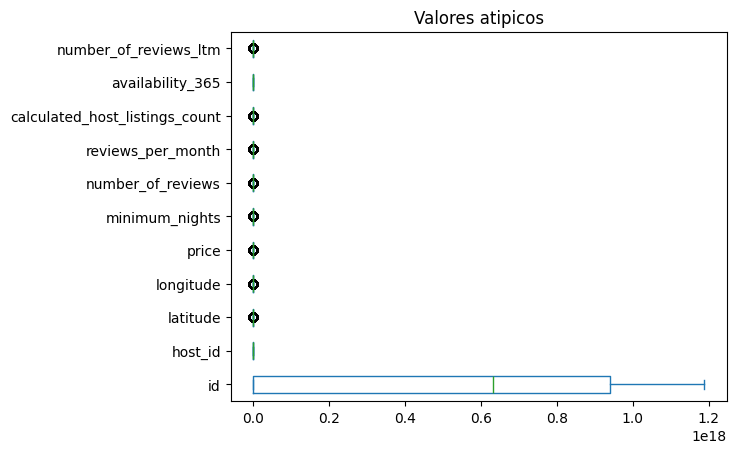

In [98]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

<Figure size 2000x1000 with 0 Axes>

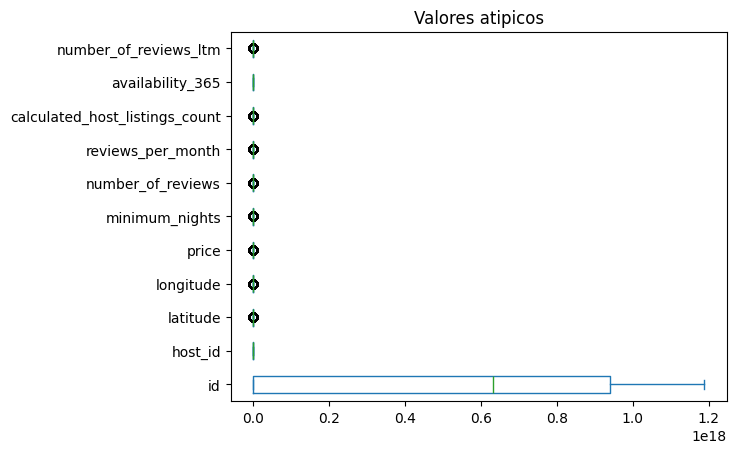

In [99]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [100]:
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido id                                1.903001e+18
host_id                           7.540126e+08
latitude                          1.953258e+01
longitude                        -9.906656e+01
price                             1.359313e+04
minimum_nights                    7.715870e+01
number_of_reviews                 2.629871e+02
reviews_per_month                 7.452194e+00
calculated_host_listings_count    1.470535e+02
availability_365                  5.982199e+02
number_of_reviews_ltm             7.333739e+01
dtype: float64
Limite inferior permitido id                               -9.116635e+17
host_id                          -3.294034e+08
latitude                          1.927733e+01
longitude                        -9.926677e+01
price                            -1.065225e+04
minimum_nights                   -6.776376e+01
number_of_reviews                -1.760880e+02
reviews_per_month                -4.017473e+00
calculated_host_listings_count   -1.1269

In [101]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]

In [102]:
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

id                                  0
host_id                             0
latitude                          359
longitude                         702
price                             142
minimum_nights                    187
number_of_reviews                 611
reviews_per_month                 379
calculated_host_listings_count    718
availability_365                    0
number_of_reviews_ltm             443
dtype: int64

In [103]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

In [104]:
#Se juntan las columnas cualitativas con las cuantitativas
mexicooutliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
mexicooutliers.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,license
0,35797,153786,19.38283,-99.20000,3663.0,1.0,0.0,0.41,1.0,363,0.0,Villa Dante,Dici,nodato,Cuajimalpa de Morelos,Entire home/apt,2024-04-17,nodato
1,898633,4796027,19.42063,-99.16586,1652.0,3.0,56.0,0.41,3.0,262,3.0,City SkyLine View from 1 Bedroom Apt in CDMX,Marco,nodato,Cuauhtémoc,Entire home/apt,2024-04-17,nodato
2,44616,196253,19.41162,-99.17794,1310.2,1.0,64.0,0.42,13.0,364,0.0,CONDESA HAUS B&B,Fernando,nodato,Cuauhtémoc,Entire home/apt,2023-03-26,nodato
3,913084,4647293,19.43956,-99.17263,814.0,2.0,161.0,1.19,1.0,236,6.0,15 blocks from Paseo de la Reforma,Martina,nodato,Miguel Hidalgo,Entire home/apt,2024-05-21,nodato
4,67703,334451,19.41152,-99.16857,1923.0,2.0,49.0,0.32,2.0,361,4.0,"2 bedroom apt. deco bldg, Condesa",Nicholas,nodato,Cuauhtémoc,Entire home/apt,2024-05-05,nodato


In [106]:
#Comprobamos que no existan valores nulos
mexicooutynul = mexicooutliers.isnull().sum()
mexicooutynul

id                                0
host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
name                              0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
last_review                       0
license                           0
dtype: int64

In [108]:
#Guardar la nueva base de datos
mexicooutliers.to_csv("mexicolimpio.csv")